In [1]:
import pandas as pd
import numpy as np
import csv
df=pd.read_csv('zomato.csv',encoding='ISO8859')
indiaDataset=df[df['Country Code']==1]

In [2]:
Faridabad=indiaDataset[indiaDataset['City']=='Faridabad']
Ghaziabad=indiaDataset[indiaDataset['City']=='Ghaziabad']
Noida=indiaDataset[indiaDataset['City']=='Noida']
Gurgaon=indiaDataset[indiaDataset['City']=='Gurgaon']
NewDelhi=indiaDataset[indiaDataset['City']=='New Delhi']
delhiNCR=pd.concat([Faridabad,Ghaziabad,Gurgaon,NewDelhi,Noida],axis=0)

In [3]:
indiaDataset=indiaDataset[indiaDataset['City']!='New Delhi']
indiaDataset=indiaDataset[indiaDataset['City']!='Ghaziabad']
indiaDataset=indiaDataset[indiaDataset['City']!='Noida']
indiaDataset=indiaDataset[indiaDataset['City']!='Faridabad']
indiaDataset=indiaDataset[indiaDataset['City']!='Gurgaon']

In [4]:
delhiNCR_Restaurant_Count=int(delhiNCR.describe().loc['count'][0])
ROI_Restaurant_Count=int(indiaDataset.describe().loc['count'][0])

In [5]:
import matplotlib.pyplot as plt
x=["DelhiNCR","ROI"]
y=[delhiNCR_Restaurant_Count,ROI_Restaurant_Count]
plt.bar(x,y)
plt.xticks(rotation=40)
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
delhi_np=delhiNCR.to_numpy()
indiaDataset_np=indiaDataset.to_numpy()

In [7]:
cuisines_in_DelhiNCR={}
for entry in delhi_np:
    cuisines=entry[9].split(',')
    for cuisine in cuisines:
        cuisine=cuisine.strip()
        cuisines_in_DelhiNCR[cuisine]=cuisines_in_DelhiNCR.get(cuisine,0)+1
cuisines_in_DelhiNCR=cuisines_in_DelhiNCR.keys()
cuisines_in_ROI={}
for entry in indiaDataset_np:
    cuisines=entry[9].split(',')
    for cuisine in cuisines:
        cuisine=cuisine.strip()
        cuisines_in_ROI[cuisine]=cuisines_in_ROI.get(cuisine,0)+1
cuisines_in_ROI=cuisines_in_ROI.keys()
for val in cuisines_in_ROI:
    if val not in cuisines_in_DelhiNCR:
        print(val)

German
Malwani
BBQ
Cajun


In [8]:
# So Clearly German,Malwani,BBQ,Cajun are Available in ROI but not in New Delhi

In [9]:
import requests
response=requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                      headers={'user-key':'b55dfb1f2c60885552f991eef3e3c318'},
                      params={'city_id':1})
data=response.json()
cuisinesInDelhiRegion=data['cuisines']
cuisinesAvailable={}
for cuisine in cuisinesInDelhiRegion:
    cuisine=cuisine['cuisine']['cuisine_name']
    cuisinesAvailable[cuisine]=True
cuisinesAvailable.keys()==cuisines_in_DelhiNCR

False

In [10]:
# So clearly the fetched cuisines in Delhi Region through API doesn't matches the cuisines
#through data analysis and hence we can conclude that due to lack of data is the reason for
# the problem

In [11]:
cuisines_in_DelhiNCR={}
for entry in delhi_np:
    cuisines=entry[9].split(',')
    for cuisine in cuisines:
        cuisine=cuisine.strip()
        cuisines_in_DelhiNCR[cuisine]=cuisines_in_DelhiNCR.get(cuisine,0)+1
cuisines_in_ROI={}
for entry in indiaDataset_np:
    cuisines=entry[9].split(',')
    for cuisine in cuisines:
        cuisine=cuisine.strip()
        cuisines_in_ROI[cuisine]=cuisines_in_ROI.get(cuisine,0)+1

In [12]:
cuisines_in_DelhiNCR=sorted(cuisines_in_DelhiNCR.items(), key=lambda item: item[1])
cuisines_in_ROI=sorted(cuisines_in_ROI.items(),key=lambda item: item[1])

In [13]:
top10DelhiNcrcuisines=[]
top10DelhiNcrnums=[]
for idx in range(len(cuisines_in_DelhiNCR)-1,len(cuisines_in_DelhiNCR)-11,-1):
    top10DelhiNcrcuisines.append(cuisines_in_DelhiNCR[idx][0])
    top10DelhiNcrnums.append(cuisines_in_DelhiNCR[idx][1])
top10ROIcuisines=[]
top10ROInums=[]
for idx in range(len(cuisines_in_ROI)-1,len(cuisines_in_ROI)-11,-1):
    top10ROIcuisines.append(cuisines_in_ROI[idx][0])
    top10ROInums.append(cuisines_in_ROI[idx][1])

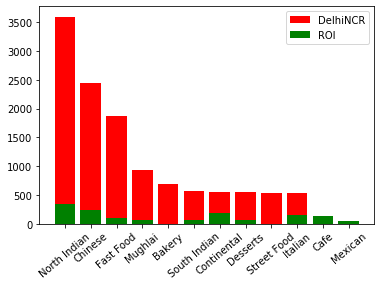

In [14]:
plt.bar(top10DelhiNcrcuisines,top10DelhiNcrnums,color='r',label='DelhiNCR')
plt.bar(top10ROIcuisines,top10ROInums,color='g',label='ROI')
plt.xticks(rotation=40)
plt.legend()
plt.show()

In [15]:
# So in DelhiNCR and ROI North Indian and Chinese cuisines are highly favored and also
# in DelhiNCR it's seen that the variety of cuisines is more comapred to ROI, with 
# cuisines and preferences having a wider spread. A reason for this might be that Delhi 
# being the Capital City of India is a great attraction for foreigners , as well as in 
# history it was the entry point to India for all invasions and subsequent control therefore
# resulting in such a huge variety in cuisines.

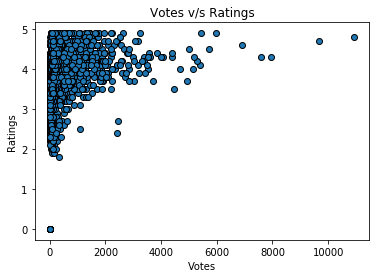

In [16]:
dataset=df[df['Votes']!=0]
ratings=dataset['Aggregate rating']
votes=dataset['Votes']
plt.scatter(votes,ratings,edgecolors='black')
plt.xlabel("Votes")
plt.ylabel("Ratings")
plt.title("Votes v/s Ratings")
plt.show()
#So clearly higher the number of votes your restaurant recieves higher is the chances of
# having a higher rating, also if your restaurant recieves very low number of votes then
# since due to low number of reviews your ratings tend to be higher.

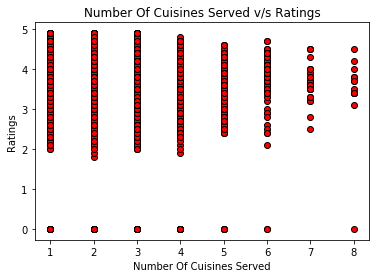

In [18]:
cuisines=df['Cuisines']
ratings=df['Aggregate rating']
np_cuisine=cuisines.to_numpy()
cuisine_nums=[]
for string in np_cuisine:
    string=str(string)
    cuisine_nums.append(len(string.split(",")))
plt.scatter(cuisine_nums,ratings,color='r',edgecolors='black')
plt.xlabel("Number Of Cuisines Served")
plt.ylabel("Ratings")
plt.title("Number Of Cuisines Served v/s Ratings")
plt.show()
#It's seen that restaurants which serve limited cuisines instead of large variety and focus
# on quality rather that quantity get higher ratings and are preffered by customers.

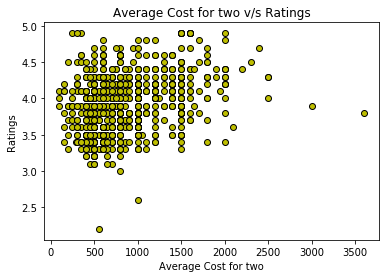

In [20]:
#We are analysing avg cost effect on ratings only for india because of currency exchange
#issues in case of entire dataset
dataset=indiaDataset[indiaDataset['Average Cost for two']!=0]
avgCost=dataset['Average Cost for two']
ratingsIndia=dataset['Aggregate rating']
plt.scatter(avgCost,ratingsIndia,color='y',edgecolors='black')
plt.xlabel("Average Cost for two")
plt.ylabel("Ratings")
plt.title("Average Cost for two v/s Ratings")
plt.show()

In [ ]:
# So its noticed that people tend to lean towards restaurants that are fairly priced not 
# too cheap not too expensive and these are restaurants that are highest rated

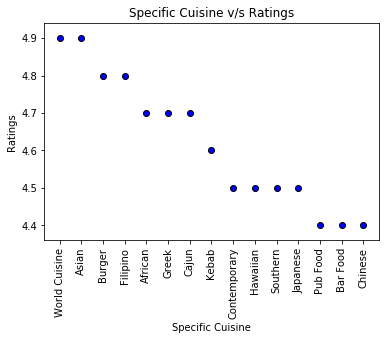

In [78]:
dataset=df.copy()
dataset.dropna(inplace=True)
cuisines=dataset['Cuisines']
ratings=dataset['Aggregate rating']
cuisines_np=cuisines.to_numpy()
ratings_np=ratings.to_numpy()
specificCuisines=[]
specificRatings=[]
topSpecific={}
for idx in range(len(cuisines_np)):
    cuisines=str(cuisines_np[idx].strip()).split(",")
    cuisineLength=len(cuisines)
    if cuisineLength==1:
        if cuisines[0] not in topSpecific:
            topSpecific[cuisines[0]]=ratings_np[idx]
topSpecific=sorted(topSpecific.items(),key=lambda item:item[1])
topSpecific=topSpecific[len(topSpecific)-1:-16:-1]
for item in topSpecific:
    specificCuisines.append(item[0])
    specificRatings.append(item[1])
plt.scatter(specificCuisines,specificRatings,color='b',edgecolors='black')
plt.xlabel("Specific Cuisine")
plt.ylabel("Ratings")
plt.xticks(rotation=90)
plt.title("Specific Cuisine v/s Ratings")
plt.show()

In [110]:
arr=df.values
local={}
for val in arr:
    locality=val[5].strip()
    if locality not in local:
        local[locality]=(val[17]*val[20],val[20])
    else:
        local[locality]=(local[locality][0]+val[17]*val[20],local[locality][1]+val[20])
locality_vs_weighted={}
for key in local:
    if key not in locality_vs_weighted:
        if local[key][0]==0:
            continue
        weighted_value=local[key][0]/local[key][1]
        locality_vs_weighted[key]=weighted_value
    else:
        if local[key][0]==0:
            continue
        weighted_value=local[key][0]/local[key][1]
        locality_vs_weighted[key]=locality_vs_weighted[key]+weighted_value
locality_vs_weighted

{'Century City Mall, Poblacion, Makati City': 4.8,
 'Little Tokyo, Legaspi Village, Makati City': 4.5,
 'Edsa Shangri-La, Ortigas, Mandaluyong City': 4.4,
 'SM Megamall, Ortigas, Mandaluyong City': 4.6947311827956995,
 'SM by the Bay, Mall of Asia Complex, Pasay City': 4.113116123642439,
 'Sofitel Philippine Plaza Manila, Pasay City': 4.9,
 'Kapitolyo': 4.7111004784689,
 'UP Town Center, Diliman, Quezon City': 4.8,
 'Addition Hills': 4.2,
 'Little Baguio': 4.3,
 'Nuvali, Don Jose, Santa Rosa': 3.6,
 'Solenad 3, Don Jose, Santa Rosa': 4.0,
 'Tagaytay City': 4.5,
 'BGC Stopover Pavillion, Bonifacio Global City': 4.5,
 'Bonifacio Global City': 4.4,
 'SM Aura Premier, Bonifacio Global City, Taguig City': 4.592801387684302,
 'Asa Norte': 3.6405405405405404,
 'Asa Sul': 3.40625,
 'í\x81guas Claras': 3.9361702127659575,
 'Brasí_lia Shopping, Asa Norte': 4.2,
 'Lago Sul': 3.6,
 'ParkShopping, Guaríç I': 4.0,
 'Pontí£o Lago Sul, Lago Sul': 3.2000000000000006,
 'Setor De Clubes Esportivos Sul': 

In [119]:
top10LocalityWithWeighted=sorted(locality_vs_weighted.items(),key=lambda item:item[1])
top10LocalityWithWeighted=top10LocalityWithWeighted[len(top10LocalityWithWeighted)-1:-11:-1]
for locality in top10LocalityWithWeighted:
    print(locality[0],locality[1])

Caddebostan 4.9
Bebek 4.9
Old Dutch Hospital, Fort 4.9
West Park 4.9
Marshalltown 4.9
City and Suburban 4.9
Barwa Towers, Al Sadd 4.9
Lexington Street, Soho 4.9
Bishopsgate, City Of London 4.9
Beak Street, Soho 4.9


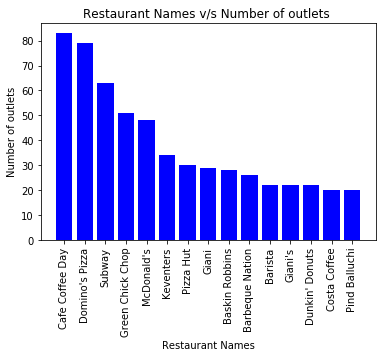

In [138]:
restaurants=df["Restaurant Name"].values
resTable={}
for res in restaurants:
    resTable[res]=resTable.get(res,0)+1
restaurants=sorted(resTable.items(),key=lambda item:item[1])
top15=restaurants[len(restaurants)-1:-16:-1]
top15ResNames=[val[0] for val in top15]
top15ResNums=[val[1] for val in top15]
plt.bar(top15ResNames,top15ResNums,color='b')
plt.xlabel("Restaurant Names")
plt.ylabel("Number of outlets")
plt.xticks(rotation=90)
plt.title("Restaurant Names v/s Number of outlets ")
plt.show()

In [139]:
ratings=df['Aggregate rating']
ratings.dropna(inplace=True)
ratings=ratings.values

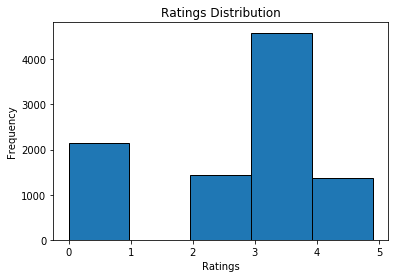

In [156]:
plt.hist(ratings,bins=5,edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')
plt.show()

C:\Users\Torre\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Torre\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


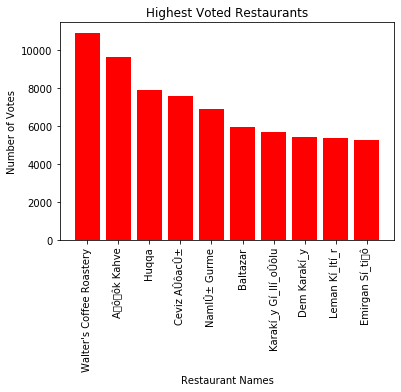

In [158]:
votes=df['Votes'].values
resnames=df['Restaurant Name'].values
res_vs_votes={}
for idx in range(len(resnames)):
    res_vs_votes[resnames[idx]]=votes[idx]
res_vs_votes=sorted(res_vs_votes.items(),key=lambda item:item[1])
top10=res_vs_votes[len(res_vs_votes)-1:-11:-1]
top10resnames=[val[0] for val in top10]
top10resnums=[val[1] for val in top10]
plt.bar(top10resnames,top10resnums,color='r')
plt.xlabel("Restaurant Names")
plt.ylabel("Number of Votes")
plt.xticks(rotation=90)
plt.title("Highest Voted Restaurants")
plt.show()


C:\Users\Torre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


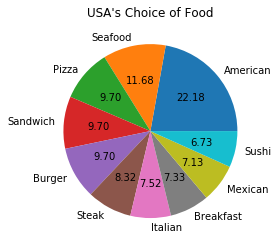

In [168]:
usadataset=df[df["Country Code"]==216]
usadataset.dropna(inplace=True)
cuisines=usadataset['Cuisines'].values
cuisinesFavoured={}
for cuisine in cuisines:
    cuisine=str(cuisine).split(",")
    for c in cuisine:
        c=c.strip()
        cuisinesFavoured[c]=cuisinesFavoured.get(c,0)+1
cuisinesFavoured=sorted(cuisinesFavoured.items(),key=lambda item:item[1])
top10=cuisinesFavoured[len(cuisinesFavoured)-1:-11:-1]
top10cuisinenames=[val[0] for val in top10]
top10cuisinenums=[val[1] for val in top10]
plt.pie(top10cuisinenums,labels=top10cuisinenames,autopct="%.2f")
plt.title("USA's Choice of Food")
plt.show()

In [209]:
from matplotlib.axis import Axis 
inddataset=df[df["Country Code"]==1]

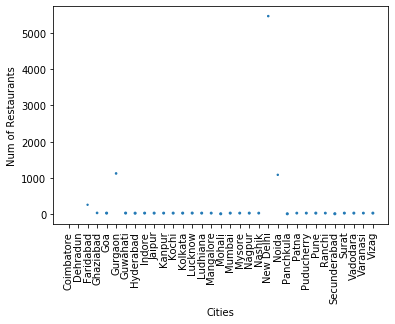

In [219]:
arr=inddataset.values
local={}
for val in arr:
    city=val[3].strip()
    if city not in local:
        local[city]=(val[17]*val[20],val[20])
    else:
        local[city]=(local[city][0]+val[17]*val[20],local[city][1]+val[20])
city_vs_weighted={}
for key in local:
    if key not in city_vs_weighted:
        if local[key][0]==0:
            city_vs_weighted[key]=0
            continue
        weighted_value=local[key][0]/local[key][1]
        city_vs_weighted[key]=weighted_value
    else:
        weighted_value=local[key][0]/local[key][1]
        city_vs_weighted[key]=city_vs_weighted[key]+weighted_value
city_vs_weighted
weighted_values_cities=[val[1] for val in city_vs_weighted.items()]
cities=inddataset['City'].values
resincities={}
for city in cities:
    resincities[city]=resincities.get(city,0)+1
cities=[val[0] for val in resincities.items()]
cities=cities[10:]
nums=[val[1] for val in resincities.items()]
nums=nums[10:]
weighted_values_cities=weighted_values_cities[10:]
plt.scatter(cities,nums,s=weighted_values_cities)
plt.xlabel("Cities",size=10)
plt.ylabel("Num of Restaurants")
plt.xticks(rotation=90)
plt.show()